## MNIST Classification

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input, ReLU, Flatten, Dense, Activation, Dropout, Softmax, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

### Load the dataset

In [17]:
x_train = np.load('./dataset/x_train.npy')
y_train = np.load('./dataset/y_train.npy')
x_test = np.load('./dataset/x_test.npy')
y_test = np.load('./dataset/y_test.npy')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = 2*x_train - 1
x_test = 2*x_test - 1

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


### Define the model

In [18]:
def CNN():
    inputs = Input(shape=(28,28,1))
    
    conv1 = Conv2D(16, 3, padding='same', name='conv1')(inputs)
    conv1 = ReLU()(conv1)
    
    pool1 = MaxPool2D(2)(conv1)
        
    conv2 = Conv2D(32, 3, padding='same', name='conv2')(pool1)
    conv2 = ReLU()(conv2)
    
    pool2 = MaxPool2D(2)(conv2)
    
    conv3 = Conv2D(64, 3, padding='same', name='conv3')(pool2)
    conv3 = ReLU()(conv3)
    
    pool3 = GlobalAveragePooling2D()(conv3)
    
    fc1 = Flatten()(conv3)
    fc1 = Dense(64)(fc1)
    fc1 = ReLU()(fc1)
    
    fc2 = Dense(10)(fc1)
    outputs =Softmax()(fc2)
    
    return Model(inputs, outputs)

In [19]:
adam = Adam(lr=0.001)
model = CNN()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['categorical_accuracy'])
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 16)        160       
_________________________________________________________________
re_lu_23 (ReLU)              (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 32)        4640      
_________________________________________________________________
re_lu_24 (ReLU)              (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)         

### Training

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1609 - categorical_accuracy: 0.9517 - val_loss: 0.0390 - val_categorical_accuracy: 0.9876
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0439 - categorical_accuracy: 0.9863 - val_loss: 0.0427 - val_categorical_accuracy: 0.9864
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0314 - categorical_accuracy: 0.9896 - val_loss: 0.0318 - val_categorical_accuracy: 0.9888
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0237 - categorical_accuracy: 0.9926 - val_loss: 0.0285 - val_categorical_accuracy: 0.9906
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0205 - categorical_accuracy: 0.9935 - val_loss: 0.0318 - val_categorical_accuracy: 0.9899
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0157 - categorical_accuracy: 0.9951 - val_loss: 0.0325 - val_categorical_accuracy: 0.9901
Epoc

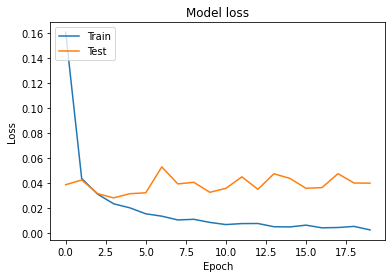

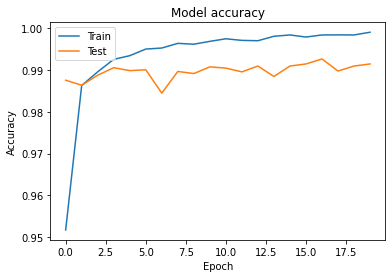

In [20]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test), shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

model.save('./model/model.h5')

### Evaluation

accuracy:  0.9915000200271606
label: 6
prediction:  6


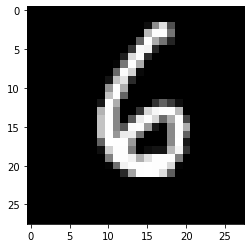

In [28]:
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('accuracy: ', accuracy[1])

# select a test image
num = 91

index_real = np.unravel_index(y_test[num].argmax(), y_test[num].shape)
print('label:', index_real[0])

category = model.predict(np.expand_dims(x_test[num],axis=0))
index_predict = np.unravel_index(category.argmax(), category.shape)
print('prediction: ', index_predict[1])

plt.imshow(np.squeeze(x_test[num]),cmap='gray')
plt.show()